# Lab | Cleaning categorical data


### 1. Import the necessary libraries if you are starting a new notebook.

In [74]:
import pandas as pd
import numpy as np
import datetime
import warnings
import os

warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [75]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\LABS\LABS-unit-4\4.lab-cleaning-categorical-data\files_for_lab')
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

customer_df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 3. What should we do with the customer_id column?

We should drop it because it's a column which doesn't gave us any important information, it's just a bunch of unconnected numbers and letters

In [76]:
customer_df = customer_df.drop(columns="Customer", axis=1)

In [77]:
customer_df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### 3.Load the continuous and discrete variables into numericals_df and categorical_df variables

In [78]:
numerical_df = customer_df.select_dtypes(exclude = object)
categorical_df = customer_df.select_dtypes(include = object)

### 4. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

In [79]:
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [80]:
#I'm going to use 'Total Claim Amount' has de target variable

target = numerical_df['Total Claim Amount']

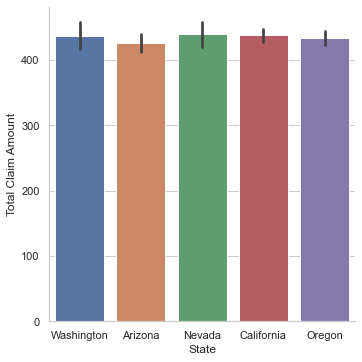

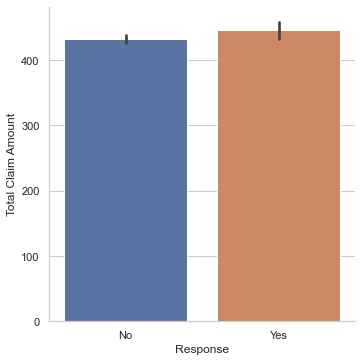

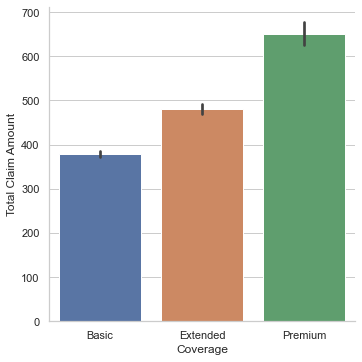

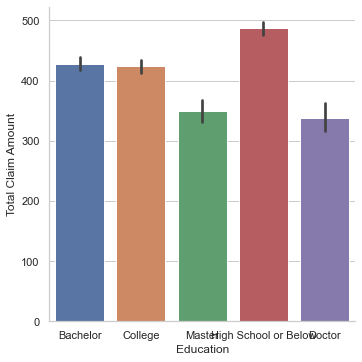

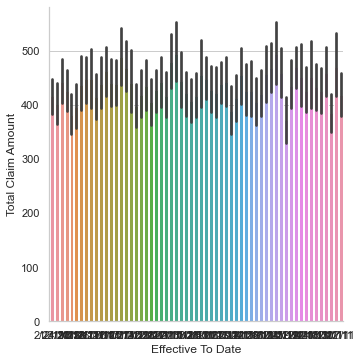

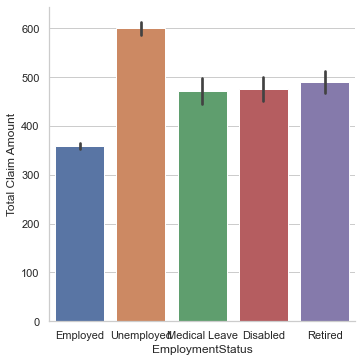

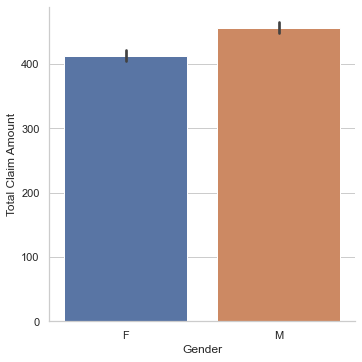

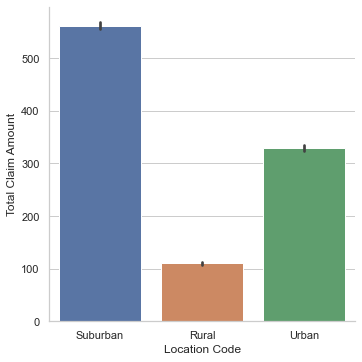

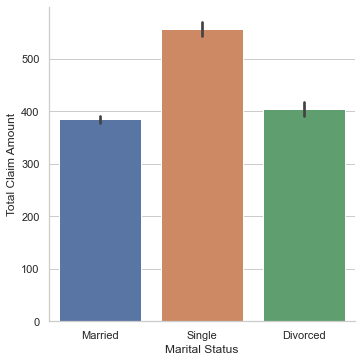

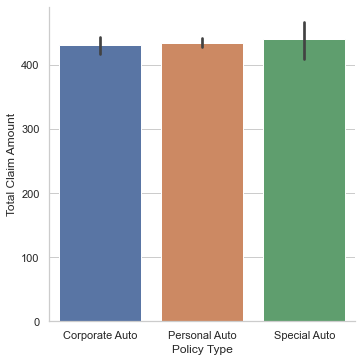

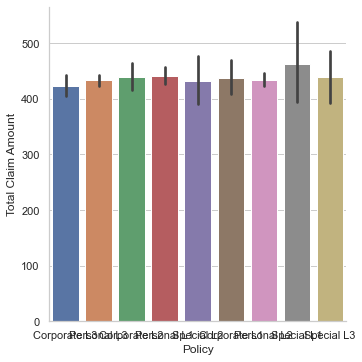

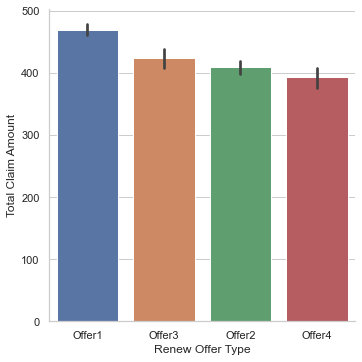

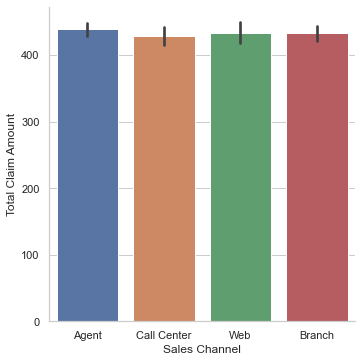

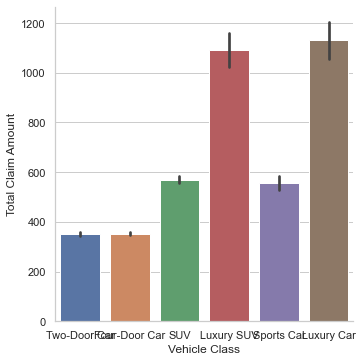

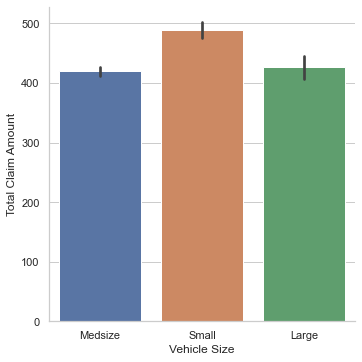

In [81]:
for column in categorical_df:
    sns.set_theme(style="whitegrid")
    sns.catplot(
    data=customer_df, kind="bar",
    x=column, y=target)


The main difference I found in comparison with the previous lab is than in the previous one the y-axis was a counts of the values of the x-axis but this time the y-axis it's the mean of my target variable en each ones of the entries of the x-axis

### 6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [82]:
# Duplicated Rows

print('Number of rows ' + str(categorical_df.shape[0]))

print('Number of duplicated rows ' + str(categorical_df.duplicated().value_counts()[1]))

#Remove duplicated in the DataFrame
categorical_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

print('Number of rows after removing duplicated rows ' + str(categorical_df.shape[0]))

Number of rows 9134
Number of duplicated rows 168
Number of rows after removing duplicated rows 8966


In [83]:
#Check if the are NaN values after the draws drop
categorical_df.isna().sum()

State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [84]:
# Rename the columns so they follow the PE8 (snake case).
categorical_df.columns = [x.lower() for x in categorical_df.columns]
categorical_df.columns = categorical_df.columns.str.replace(" ", "_", regex=True)

In [85]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [86]:
for column in categorical_df:
    display(categorical_df[column].value_counts())

California    3079
Oregon        2541
Arizona       1681
Nevada         872
Washington     793
Name: state, dtype: int64

No     7821
Yes    1145
Name: response, dtype: int64

Basic       5466
Extended    2695
Premium      805
Name: coverage, dtype: int64

Bachelor                2703
College                 2629
High School or Below    2573
Master                   728
Doctor                   333
Name: education, dtype: int64

1/27/11    191
1/10/11    190
1/17/11    180
1/19/11    179
2/14/11    179
1/3/11     174
1/26/11    174
1/31/11    169
1/20/11    166
2/19/11    166
1/28/11    165
2/26/11    164
2/27/11    164
2/4/11     164
1/5/11     163
1/11/11    162
2/10/11    159
1/21/11    158
2/7/11     156
1/29/11    155
2/22/11    155
2/28/11    155
2/5/11     154
2/12/11    154
1/2/11     154
2/3/11     154
1/18/11    151
1/23/11    151
2/1/11     150
2/11/11    150
1/14/11    149
2/2/11     149
1/15/11    149
1/8/11     148
2/25/11    148
1/7/11     147
1/25/11    147
2/18/11    147
2/21/11    146
1/13/11    145
1/9/11     145
1/1/11     144
2/6/11     143
1/24/11    143
1/16/11    141
1/6/11     141
1/30/11    141
2/23/11    139
2/24/11    138
2/16/11    137
2/13/11    137
1/22/11    136
2/9/11     136
2/8/11     134
2/17/11    133
2/15/11    130
2/20/11    130
1/12/11    122
1/4/11     115
Name: effective_to_date, dtype: int64

Employed         5602
Unemployed       2293
Medical Leave     420
Disabled          397
Retired           254
Name: employmentstatus, dtype: int64

F    4577
M    4389
Name: gender, dtype: int64

Suburban    5652
Rural       1750
Urban       1564
Name: location_code, dtype: int64

Married     5208
Single      2431
Divorced    1327
Name: marital_status, dtype: int64

Personal Auto     6636
Corporate Auto    1953
Special Auto       377
Name: policy_type, dtype: int64

Personal L3     3330
Personal L2     2082
Personal L1     1224
Corporate L3    1003
Corporate L2     592
Corporate L1     358
Special L2       163
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3683
Offer2    2830
Offer3    1429
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3392
Branch         2532
Call Center    1737
Web            1305
Name: sales_channel, dtype: int64

Four-Door Car    4539
Two-Door Car     1851
SUV              1766
Sports Car        469
Luxury SUV        180
Luxury Car        161
Name: vehicle_class, dtype: int64

Medsize    6306
Small      1736
Large       924
Name: vehicle_size, dtype: int64

#### I'm gonna change the type the column 'effective_to_date' to datetime64[ns]


In [87]:
categorical_df['effective_to_date'] = categorical_df['effective_to_date'].astype('datetime64[ns]')

#### I'm gonna clean the column 'employmentstatus' packing the values 'Medical Leave' and 'Disabled' in the same value (Medical Leave)

In [88]:
categorical_df.employmentstatus.value_counts()

Employed         5602
Unemployed       2293
Medical Leave     420
Disabled          397
Retired           254
Name: employmentstatus, dtype: int64

In [89]:
def clean_employmentstatus_col(x):
    if x in ['Medical Leave', 'Disabled']:
        return 'Medical Leave'
    else:
        return x
    
categorical_df["employmentstatus"] = categorical_df["employmentstatus"].apply(clean_employmentstatus_col)

In [90]:
categorical_df.employmentstatus.value_counts()

Employed         5602
Unemployed       2293
Medical Leave     817
Retired           254
Name: employmentstatus, dtype: int64

# Lab | Feature extraction

### 1. Open the categoricals variable we created before.


In [91]:
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

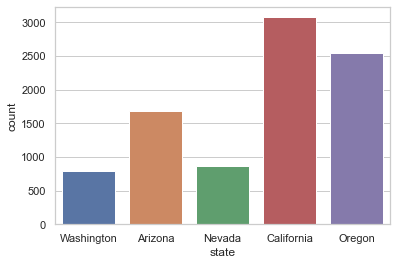

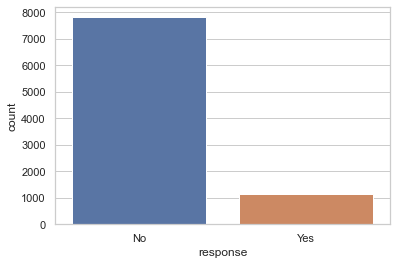

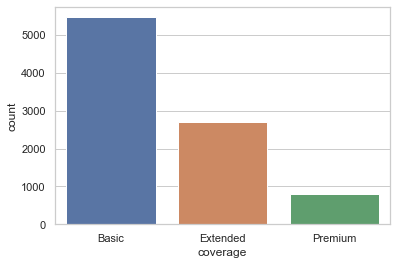

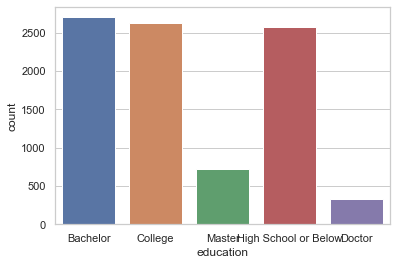

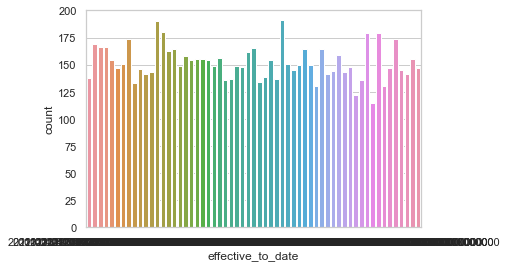

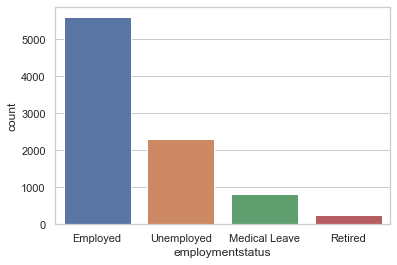

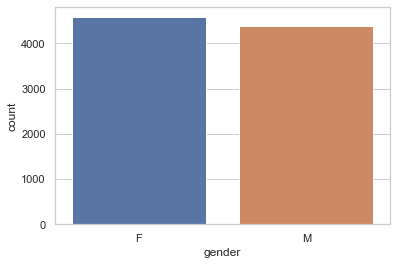

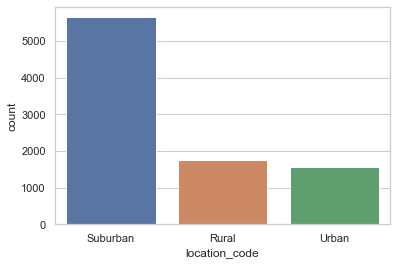

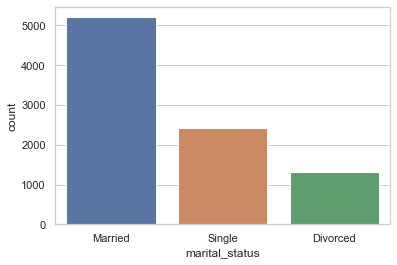

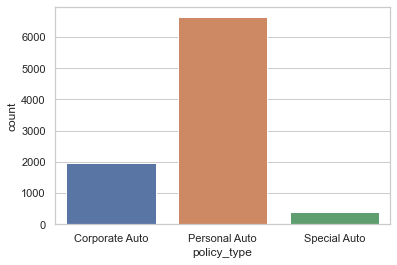

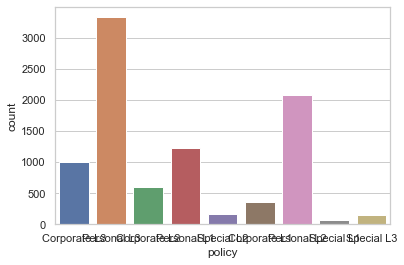

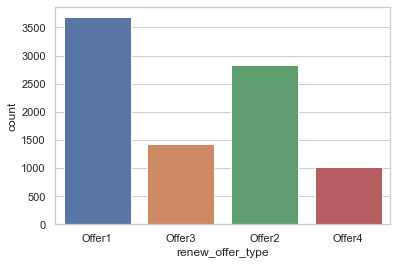

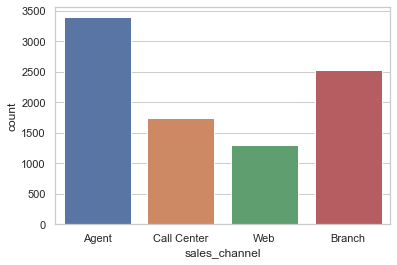

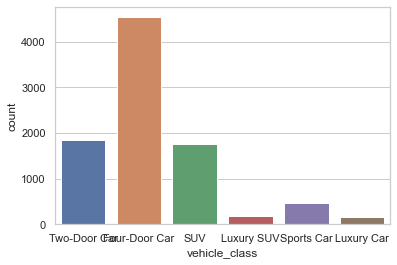

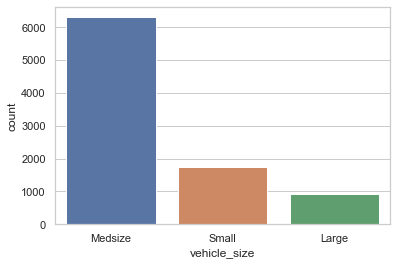

In [92]:
for column in categorical_df:
    plt.figure()
    sns.countplot(x=column, data=categorical_df)
    plt.show()

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

 I'm gonning pack the values 'Luxury SUV' and 'Luxury Car' in the same value('Luxury Car')

In [93]:
categorical_df.vehicle_class.value_counts()

Four-Door Car    4539
Two-Door Car     1851
SUV              1766
Sports Car        469
Luxury SUV        180
Luxury Car        161
Name: vehicle_class, dtype: int64

In [94]:
def clean_vehicle_class_col(x):
    if x in ['Luxury SUV', 'Luxury Car']:
        return 'Luxury Car'
    else:
        return x
    
categorical_df["vehicle_class"] = categorical_df["vehicle_class"].apply(lambda x: clean_vehicle_class_col(x))

In [95]:
categorical_df.vehicle_class.value_counts()

Four-Door Car    4539
Two-Door Car     1851
SUV              1766
Sports Car        469
Luxury Car        341
Name: vehicle_class, dtype: int64

I'm going to pack all the subtypes (L3,L3,L1) in the main value (Personal, Corporate...) of the column 'policy'

In [96]:
categorical_df.policy.value_counts()

Personal L3     3330
Personal L2     2082
Personal L1     1224
Corporate L3    1003
Corporate L2     592
Corporate L1     358
Special L2       163
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [97]:
def clean_policy_col(x):
    if x in ['Personal L3', 'Personal L2', 'Personal L1']:
        return 'Personal'
    elif x in ['Corporate L3', 'Corporate L2', 'Corporate L1']:
        return 'Corporate'
    else:
        return 'Special'
    
categorical_df["policy"] = categorical_df["policy"].apply(lambda x: clean_policy_col(x))

In [98]:
categorical_df.policy.value_counts()

Personal     6636
Corporate    1953
Special       377
Name: policy, dtype: int64

### 4. Plot time variable. Can you extract something from it?

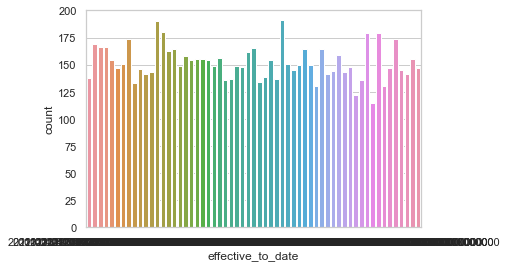

In [99]:
plt.figure()
sns.countplot(x='effective_to_date', data=categorical_df)
plt.show()

No, there is too many different values.

I'm going to create a new column sorting all data points by month

In [100]:
categorical_df["month_year"] = categorical_df["effective_to_date"].dt.strftime('%b')

In [101]:
categorical_df["month_year"].value_counts()

Jan    4795
Feb    4171
Name: month_year, dtype: int64

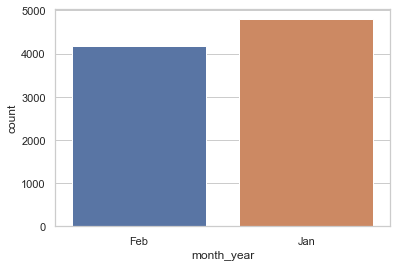

In [102]:
plt.figure()
sns.countplot(x='month_year', data=categorical_df)
plt.show()

# Lab | Data cleaning and wrangling

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [103]:
numerical_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [104]:
numerical_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Customer Lifetime Value


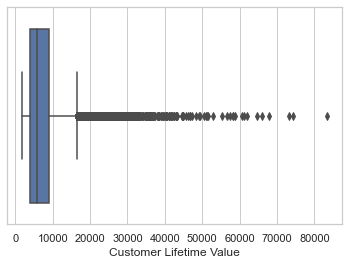

Income


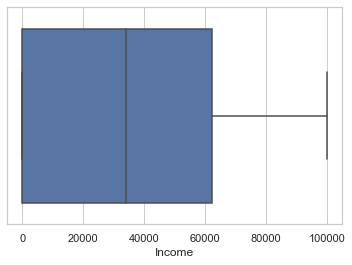

Monthly Premium Auto


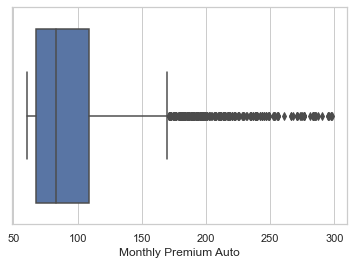

Months Since Last Claim


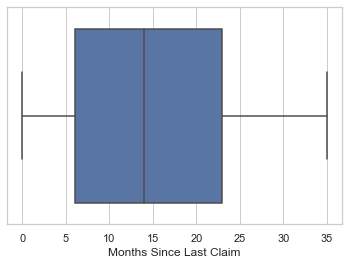

Months Since Policy Inception


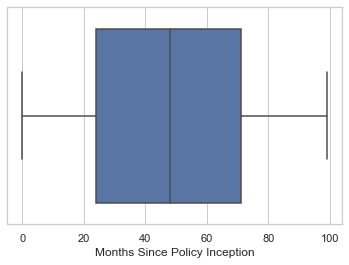

Number of Open Complaints


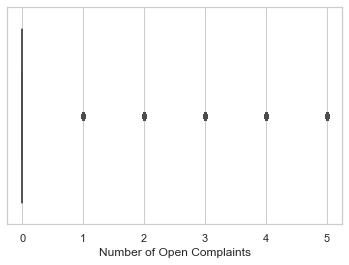

Number of Policies


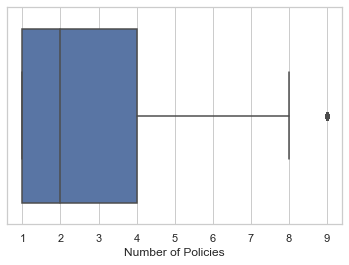

Total Claim Amount


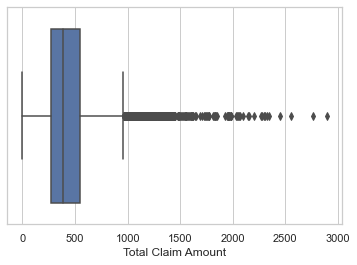

In [105]:
for item in numerical_df.columns:
    print(item)
    sns.boxplot(x = numerical_df[item])
    plt.show()

I'm going to drop the outliers of the columns 'Customer Lifetime Value', 'Total Claim Amount', Monthly Premium Auto'

In [106]:
cols = ['Total Claim Amount', 'Customer Lifetime Value', 'Monthly Premium Auto']

(9134, 8)


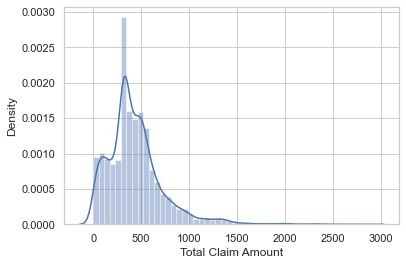

(9134, 8)


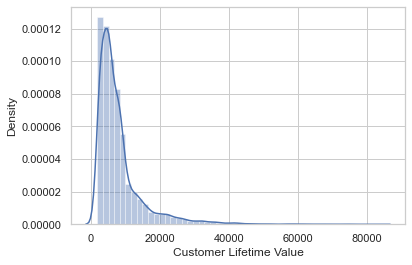

(9134, 8)


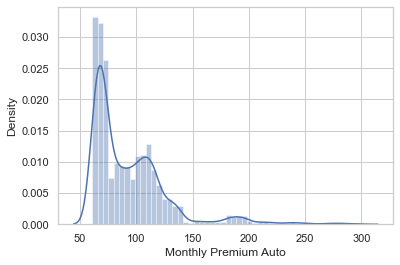

In [107]:
# Let's take a look to the density of the columns before dropping the outliers

for col in numerical_df[cols]:
    print(numerical_df.shape)
    sns.distplot(numerical_df[col])
    plt.show(cols) #column with the outlier

In [108]:
def clean_outliers (data, columns):

    Q1 = data[columns].quantile(0.25)  #first quantile
    Q3 = data[columns].quantile(0.75)  #second quantile
    IQR = Q3 - Q1           #inter quantiler range

    data = data[~(  #Negation so we get the datapoints inside of the range
        (data[columns] < (Q1 - 1.5 * IQR))
        | (data[columns] > (Q3 + 1.5 * IQR)
          )).any(axis=1)]
    

#Checking of look the boxplots after removing the outliers
    #for drop in columns:
     #   print(data.shape)
      #  sns.distplot(data[drop])
       # plt.show(columns) #column with the outlier
        
    
    return data

In [109]:
numerical_df = clean_outliers(numerical_df, cols)

In [110]:
numerical_df.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247


(7847, 8)


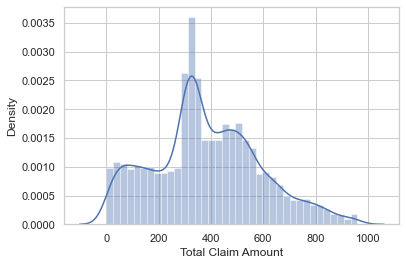

(7847, 8)


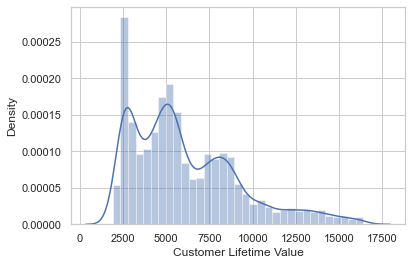

(7847, 8)


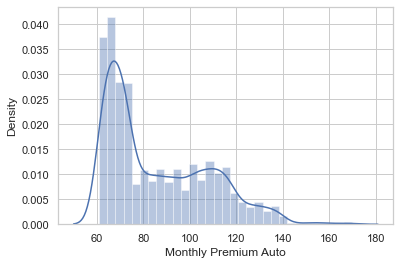

In [111]:
for col in numerical_df[cols]:
    print(numerical_df.shape)
    sns.distplot(numerical_df[col])
    plt.show(cols)

### 2. Create a copy of the dataframe for the data wrangling

In [112]:
#Creating the 'y' variable
y = numerical_df.iloc[:,-1]
y = pd.DataFrame(y)

In [113]:
# Dropping the target variable from the numericals
numerical_df = numerical_df.drop('Total Claim Amount', axis = 1)

numerical_df_copy = numerical_df

categorical_df_copy = categorical_df

### 3. Normalize the continuous variables. You can use any one method you want.

In [114]:
from sklearn.preprocessing import StandardScaler

preprocessor = StandardScaler()

numerical_df = preprocessor.fit_transform(numerical_df)

In [115]:
from sklearn.preprocessing import LabelEncoder

preprocessor_y = LabelEncoder()

y = preprocessor_y.fit_transform(y)

### 4. Encode the categorical variables

In [116]:
categorical_df.head(2)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month_year
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize,Feb
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize,Jan


In [117]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'month_year'],
      dtype='object')

In [118]:
#splitting the columns between Ordinal and OneHot

col1 = ['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

col2 = ['coverage', 'employmentstatus', 'location_code', 'vehicle_size']

cat_col1 = categorical_df[col1]
cat_col2 = categorical_df[col2]

In [119]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor1 = OneHotEncoder()
preprocessor2 = OrdinalEncoder()

cat_col1 = preprocessor1.fit_transform(cat_col1)
cat_col2 = preprocessor2.fit_transform(cat_col2)

### 5.The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [120]:
categorical_df["effective_to_date"] = categorical_df["effective_to_date"].dt.strftime('%w-%m') #Sunday = 0

In [121]:
categorical_df["effective_to_date"]

0       4-02
1       1-01
2       6-02
3       4-01
4       4-02
        ... 
9128    4-01
9129    4-02
9131    0-02
9132    4-02
9133    1-02
Name: effective_to_date, Length: 8966, dtype: object

### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding

In [122]:
numerical_df

array([[-1.06698424,  0.58873276, -0.77976444, ..., -1.54333572,
        -0.42311556, -0.82829183],
       [ 2.17772567,  0.34146528,  0.9917502 , ..., -0.35831122,
        -0.42311556, -0.422852  ],
       [ 0.49780462, -1.26483459,  0.90090329, ...,  0.61125428,
        -0.42311556,  1.60434718],
       ...,
       [ 0.66383258, -1.26483459, -0.0529892 , ..., -0.39422105,
         2.808735  , -0.422852  ],
       [ 0.45888975, -0.54213634,  0.44666877, ..., -1.61515539,
        -0.42311556, -0.01741216],
       [-1.1155984 , -1.26483459, -0.41637682, ...,  1.50900012,
        -0.42311556, -0.82829183]])

In [123]:
#Changing the type from a compressed sparse row format to numpy array
cat_col1 = np.matrix(cat_col1.toarray())

In [124]:
cat_col1

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 1.]])

In [125]:
cat_col2

array([[0., 0., 1., 1.],
       [1., 3., 1., 1.],
       [2., 0., 1., 1.],
       ...,
       [1., 3., 1., 1.],
       [1., 0., 1., 0.],
       [1., 3., 1., 1.]])

In [126]:
# Joinning the two categorical variables into one
new_cat = np.column_stack((cat_col2, cat_col1))

In [127]:
# Joining the new_cat with the numericals
length_of_num = len(numerical_df)
new_cat.resize((length_of_num), refcheck=False)
X = np.column_stack((numerical_df, new_cat))

# Lab | Comparing regression models

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [128]:
 from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=1)

In [130]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### 2.Try a simple linear regression with all the data to see whether we are getting good results.

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [132]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [133]:
# Calculating the predictions

In [134]:
# Train set
pred_train = classifier.predict(X_train)

In [135]:
# Test set
pred_test = classifier.predict(X_test)

In [136]:
# Print R^2 scores
print("the r2 score on train  :", classifier.score(X_train, y_train))
print("the r2 score on test  :", classifier.score(X_test, y_test))


the r2 score on train  : 0.2993086161290659
the r2 score on test  : 0.31100999069988045


## 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [146]:
def model_function (model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain, ytrain)
    predtrain = model.predict(xtrain)
    predtest = model.predict(xtest)
    print("the r2 score on train  :", model.score(xtrain, ytrain))
    print("the r2 score on test  :", model.score(xtest, ytest))   

## 4. Use the function to check LinearRegressor and KNeighborsRegressor

In [147]:
# LinearRegression

model_function(LinearRegression(), X_train, X_test, y_train, y_test)

the r2 score on train  : 0.2993086161290659
the r2 score on test  : 0.31100999069988045


In [149]:
# KNeighborsRegressor

model_function(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

the r2 score on train  : 0.27749453750910413
the r2 score on test  : 0.10233545647558387


## 5. You can check also the MLPRegressor for this task!

In [150]:
from sklearn.neural_network import MLPRegressor

In [151]:
model_function(MLPRegressor(), X_train, X_test, y_train, y_test)

the r2 score on train  : 0.22948729505719945
the r2 score on test  : 0.22345047436861742
